In [4]:
import numpy as np
import pandas as pd

# Dataset

In [48]:
df = pd.read_csv("Dataset_Aborto.csv")

C:\Users\blute\AppData\Local\Temp\ipykernel_12668\3323660569.py:1: DtypeWarning: Columns (13,20,28,29,40,41,42) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("Dataset_Aborto.csv")


In [49]:
ls_temas= ["anticonceptivo","nivel_edu","ocupacion"]

In [50]:
df[ls_temas].head()

,anticonceptivo,nivel_edu,ocupacion
0,NINGUNO,PREPARATORIA,ESTUDIANTE
1,NINGUNO,SECUNDARIA,TRABAJADORA DEL HOGAR NO REMUNERADA
2,NINGUNO,SIN ACCESO A LA EDUCACION FORMAL,TRABAJADORA DEL HOGAR NO REMUNERADA
3,NINGUNO,PREPARATORIA,EMPLEADA
4,NINGUNO,SECUNDARIA,ESTUDIANTE


In [5]:
df[ls_temas].isna().mean()

anticonceptivo    0.180200
nivel_edu         0.012528
ocupacion         0.173354
dtype: float64

## Datos a usar (AUX)

In [62]:
aux = df[ls_temas]
aux["año"] = df["año"]

C:\Users\blute\AppData\Local\Temp\ipykernel_12668\4241891141.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  aux["año"] = df["año"]


In [63]:
aux= aux.convert_dtypes()

In [64]:
aux.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 98019 entries, 0 to 98018
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   anticonceptivo  80356 non-null  string
 1   nivel_edu       96791 non-null  string
 2   ocupacion       81027 non-null  string
 3   año             98019 non-null  Int64 
dtypes: Int64(1), string(3)
memory usage: 3.1 MB


### Categorias de anticonceptivos 

In [65]:
cat_anti =aux[ls_temas[0]].value_counts()
cat_anti

NINGUNO                               49482
CONDON                                21560
DIU                                    2908
PASTILLA DE EMERGENCIA                 1833
INYECCION                              1468
PASTILLA ANTICONCEPTIVA                1234
PARCHES                                 937
IMPLANTE SUBDERMICO                     688
LIGADURA DE TROMPAS                     114
CONDON + PASTILLA DE EMERGENCIA          86
ANILLO VAGINAL                           14
CONDON + DIU                             10
CONDON + INYECCION                        5
VASECTOMIA                                5
CONDON + PARCHE                           4
CONDON + IMPLANTE                         3
INYECCION + LIGADURA DE TROMPAS           1
CONDON + PASTILLA ANTICONCEPTIVA          1
INYECCION + DIU                           1
PASTILLA DE EMERGENCIA + PARCHES          1
PASTILLA DE EMERGENCIA + INYECCION        1
Name: anticonceptivo, dtype: Int64

#### LLenado de nulos y categoria otros

In [66]:
aux[ls_temas[0]]= aux[ls_temas[0]].fillna("NO CONTESTO")

aux[ls_temas[0]] = aux[[ls_temas[0]]].applymap(lambda x: "Combinado" if "+" in x  else x)

In [73]:
cat_anti =aux[ls_temas[0]].value_counts()
cat_anti

NINGUNO                   49482
CONDON                    21560
NO CONTESTO               17663
LARGA DURACION             3715
HORMONAL                   3653
PASTILLA DE EMERGENCIA     1833
Combinado                   113
Name: anticonceptivo, dtype: int64

In [71]:
ls_hormonales = ["PARCHES","PASTILLA ANTICONCEPTIVA", "INYECCION","ANILLO VAGINAL"]
ls_dura =["DIU", "IMPLANTE SUBDERMICO","LIGADURA DE TROMPAS","LIGADURA DE TROMPAS", "VASECTOMIA"]

In [72]:
aux[ls_temas[0]] = aux[[ls_temas[0]]].applymap(lambda x: "HORMONAL" if x in ls_hormonales else x)
aux[ls_temas[0]] = aux[[ls_temas[0]]].applymap(lambda x: "LARGA DURACION" if x in ls_dura else x)

In [74]:
aux.to_excel("categorias1.xlsx", index = False)

In [16]:
ls_anti =[x for x in cat_anti.index if cat_anti[x] > 100] 

In [17]:
ls_anti

['NINGUNO', 'CONDON', 'NO CONTESTO', 'DIU', 'PASTILLA DE EMERGENCIA']

In [14]:
aux[ls_temas[0]] = aux[[ls_temas[0]]].applymap(lambda x: x if x in ls_anti  else "OTROS")

In [15]:
aux[ls_temas[0]].value_counts()

NINGUNO                    49482
CONDON                     21560
NO CONTESTO                17663
DIU                         2908
OTROS                       1871
PASTILLA DE EMERGENCIA      1833
INYECCION                   1468
PASTILLA ANTICONCEPTIVA     1234
Name: anticonceptivo, dtype: int64

#### Datos agrupados

In [233]:
aux[[ls_temas[0],'año']].dropna().groupby(by=['año']).value_counts().to_frame()/aux[[ls_temas[0],'año']].dropna().groupby(by=['año']).size().to_frame()

0
año  anticonceptivo                   
2016 NINGUNO                  0.477883
     CONDON                   0.277342
     NO CONTESTO              0.109864
     DIU                      0.043901
     INYECCION                0.027756
     OTROS                    0.022725
     PASTILLA DE EMERGENCIA   0.022504
     PASTILLA ANTICONCEPTIVA  0.018025
2017 NINGUNO                  0.576827
     NO CONTESTO              0.176327
     CONDON                   0.175134
     DIU                      0.025685
     OTROS                    0.015968
     INYECCION                0.015968
     PASTILLA DE EMERGENCIA   0.007615
     PASTILLA ANTICONCEPTIVA  0.006478
2018 NINGUNO                  0.542930
     CONDON                   0.256883
     NO CONTESTO              0.100006
     DIU                      0.032598
     PASTILLA DE EMERGENCIA   0.023110
     INYECCION                0.017056
     OTROS                    0.015891
     PASTILLA ANTICONCEPTIVA  0.011526
2019 NINGUNO                  0.512032
     CONDON                   0.307849
     NO CONTESTO              0.073044
     PASTILLA DE EMERGENCIA   0.029900
     DIU                      0.025375
     OTROS                    0.017900
     INYECCION                0.017048
     PASTILLA ANTICONCEPTIVA  0.016851
2020 NINGUNO                  0.581063
     CONDON                   0.221226
     NO CONTESTO              0.126986
     DIU                      0.035673
     OTROS                    0.019789
     PASTILLA DE EMERGENCIA   0.015263
2021 NINGUNO                  0.569662
     NO CONTESTO              0.160228
     CONDON                   0.151362
     OTROS                    0.033266
     PASTILLA ANTICONCEPTIVA  0.027572
     DIU                      0.025458
     PASTILLA DE EMERGENCIA   0.021716
     INYECCION                0.010736
2022 NO CONTESTO              0.999842
     OTROS                    0.000158

### Categorias Nivel Educativo

In [26]:
cat_edu =aux[ls_temas[1]].value_counts()
cat_edu

PREPARATORIA                        44656
SECUNDARIA                          28965
LICENCIATURA                        17526
PRIMARIA                             4364
SIN ACCESO A LA EDUCACION FORMAL      834
MAESTRIA                              443
DOCTORADO                               3
Name: nivel_edu, dtype: Int64

#### Nulos

In [28]:
aux[ls_temas[1]].isna().count()

98019

In [38]:
aux[ls_temas[1]]= aux[ls_temas[1]].fillna("NO CONTESTO")

#### Agrupados

In [235]:
aux[[ls_temas[1],'año']].dropna().groupby(by=['año']).value_counts().to_frame()/aux[[ls_temas[1],'año']].dropna().groupby(by=['año']).size().to_frame()

0
año  nivel_edu                                 
2016 PREPARATORIA                      0.440501
     SECUNDARIA                        0.313907
     LICENCIATURA                      0.178053
     PRIMARIA                          0.054564
     SIN ACCESO A LA EDUCACION FORMAL  0.008484
     MAESTRIA                          0.004436
     DOCTORADO                         0.000055
2017 PREPARATORIA                      0.444146
     SECUNDARIA                        0.303853
     LICENCIATURA                      0.182426
     PRIMARIA                          0.049851
     SIN ACCESO A LA EDUCACION FORMAL  0.014464
     MAESTRIA                          0.005202
     DOCTORADO                         0.000057
2018 PREPARATORIA                      0.448733
     SECUNDARIA                        0.296700
     LICENCIATURA                      0.192398
     PRIMARIA                          0.047260
     SIN ACCESO A LA EDUCACION FORMAL  0.011196
     MAESTRIA                          0.003654
     DOCTORADO                         0.000059
2019 PREPARATORIA                      0.465478
     SECUNDARIA                        0.297641
     LICENCIATURA                      0.181884
     PRIMARIA                          0.042804
     SIN ACCESO A LA EDUCACION FORMAL  0.007620
     MAESTRIA                          0.004572
2020 PREPARATORIA                      0.477723
     SECUNDARIA                        0.301838
     LICENCIATURA                      0.175078
     PRIMARIA                          0.035052
     MAESTRIA                          0.006186
     SIN ACCESO A LA EDUCACION FORMAL  0.004124
2021 PREPARATORIA                      0.501730
     SECUNDARIA                        0.284702
     LICENCIATURA                      0.166653
     PRIMARIA                          0.038309
     MAESTRIA                          0.004641
     SIN ACCESO A LA EDUCACION FORMAL  0.003966
2022 PREPARATORIA                      0.488624
     SECUNDARIA                        0.277715
     LICENCIATURA                      0.191383
     PRIMARIA                          0.034694
     SIN ACCESO A LA EDUCACION FORMAL  0.004841
     MAESTRIA                          0.002743

### Categorias de Ocupación

In [37]:
cat_ocu =aux[ls_temas[2]].value_counts()
cat_ocu

NO PERCIBE INGRESO    40623
EMPLEADA              33621
ESTUDIANTE            23775
Name: ocupacion, dtype: int64

#### Nulos

In [31]:
aux[ls_temas[2]].isna().count()

98019

In [32]:
aux[ls_temas[2]]= aux[ls_temas[2]].fillna("NO CONTESTO")

### Datos agrupados

In [237]:
aux[[ls_temas[2],'año']].dropna().groupby(by=['año']).value_counts().to_frame()/aux[[ls_temas[2],'año']].dropna().groupby(by=['año']).size().to_frame()

0
año  ocupacion                                    
2016 EMPLEADA                             0.410939
     TRABAJADORA DEL HOGAR NO REMUNERADA  0.290130
     ESTUDIANTE                           0.261000
     DESEMPLEADA                          0.019104
     NO ESPECIFICADO                      0.018826
2017 EMPLEADA                             0.460490
     TRABAJADORA DEL HOGAR NO REMUNERADA  0.273763
     ESTUDIANTE                           0.249485
     NO ESPECIFICADO                      0.016262
2018 ESTUDIANTE                           0.433157
     TRABAJADORA DEL HOGAR NO REMUNERADA  0.428166
     DESEMPLEADA                          0.083089
     EMPLEADA                             0.036798
     NO ESPECIFICADO                      0.018790
2019 EMPLEADA                             0.430174
     ESTUDIANTE                           0.258184
     TRABAJADORA DEL HOGAR NO REMUNERADA  0.236074
     DESEMPLEADA                          0.054448
     NO ESPECIFICADO                      0.021119
2020 EMPLEADA                             0.543013
     ESTUDIANTE                           0.339450
     DESEMPLEADA                          0.094402
     NO ESPECIFICADO                      0.023135
2021 EMPLEADA                             0.562006
     ESTUDIANTE                           0.298284
     DESEMPLEADA                          0.095169
     TRABAJADORA DEL HOGAR NO REMUNERADA  0.027869
     NO ESPECIFICADO                      0.016673
2022 EMPLEADA                             0.578760
     ESTUDIANTE                           0.308820
     DESEMPLEADA                          0.079316
     NO ESPECIFICADO                      0.033104

### Categorias nuevas

In [35]:
ls_ocu = [x for x in cat_ocu.index if cat_ocu[x] >20000 ]
ls_ocu

['EMPLEADA', 'ESTUDIANTE']

In [36]:
aux[ls_temas[2]] = aux[[ls_temas[2]]].applymap(lambda x: x if x in ls_ocu else "NO PERCIBE INGRESO")

## Dataset final

In [40]:
aux.to_excel("AbortoVariablesFinales.xlsx")

## Otro

In [7]:
df.columns

Index(['año', 'mes', 'fingreso', 'autoref', 'edocivil_descripcion', 'edad',
       'desc_derechohab', 'nivel_edu', 'ocupacion', 'religion', 'parentesco',
       'entidad', 'alc_o_municipio', 'menarca', 'fsexual', 'fmenstrua',
       'sememb', 'nhijos', 'gesta', 'naborto', 'npartos', 'ncesarea', 'nile',
       'consejeria', 'anticonceptivo', 'c_fecha', 'c_num', 'motiles',
       'h_fingreso', 'h_fegreso', 'desc_servicio', 'p_semgest', 'p_diasgesta',
       'p_consent', 'procile', 's_complica', 'c_dolor', 'tanalgesico',
       'cconsejo', 'panticoncep', 'fecha_cierre', 'resultado_ile',
       'medicamento', 'procile_simplificada', 'procile_completa',
       'clues_hospital'],
      dtype='object')

In [17]:
df["ncesarea"].describe()

count    91858.000000
mean         0.312700
std          0.595058
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          7.000000
Name: ncesarea, dtype: float64

In [12]:
df["fsexual"].isna().mean()

0.044358746773584715

In [13]:
aux= df[["fsexual"]]
aux

,fsexual
0,13.0
1,17.0
2,15.0
3,15.0
4,15.0
...,...
98014,15.0
98015,20.0
98016,15.0
98017,18.0


In [27]:
aux["embarazos"]= df[["npartos", "ncesarea"]].sum(axis=1)

C:\Users\blute\AppData\Local\Temp\ipykernel_12668\943182382.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  aux["embarazos"]= df[["npartos", "ncesarea"]].sum(axis=1)
C:\Users\blute\AppData\Local\Temp\ipykernel_12668\943182382.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  aux["embarazos"]= df[["npartos", "ncesarea"]].sum(axis=1)


In [25]:
df[["npartos", "ncesarea"]]

,npartos,ncesarea
0,0.0,0.0
1,0.0,1.0
2,0.0,1.0
3,0.0,1.0
4,0.0,0.0
...,...,...
98014,1,0.0
98015,1,1.0
98016,3,0.0
98017,0,0.0


In [35]:
aux["fsexual"] =aux[["fsexual"]].applymap(lambda x: x if x <50 else 45)
aux["fsexual"] =aux[["fsexual"]].applymap(lambda x: x if x >14 else 15)

C:\Users\blute\AppData\Local\Temp\ipykernel_12668\2341498111.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  aux["fsexual"] =aux[["fsexual"]].applymap(lambda x: x if x <50 else 45)
C:\Users\blute\AppData\Local\Temp\ipykernel_12668\2341498111.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  aux["fsexual"] =aux[["fsexual"]].applymap(lambda x: x if x >14 else 15)


In [36]:
aux["fsexual"].describe()

count    98019.000000
mean        18.332711
std          6.114745
min         15.000000
25%         15.000000
50%         17.000000
75%         18.000000
max         49.000000
Name: fsexual, dtype: float64

### Nulos

In [39]:
aux["fsexual"].isna().count()

98019

In [40]:
aux["fsexual"]= aux["fsexual"].fillna(18)

C:\Users\blute\AppData\Local\Temp\ipykernel_12668\4030904581.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  aux["fsexual"]= aux["fsexual"].fillna(18)


### Embarazos

In [45]:
aux["embarazos"]

0        0.0
1        1.0
2        1.0
3        1.0
4        0.0
        ... 
98014    0.0
98015    1.0
98016    0.0
98017    0.0
98018    0.0
Name: embarazos, Length: 98019, dtype: float64

<AxesSubplot:>

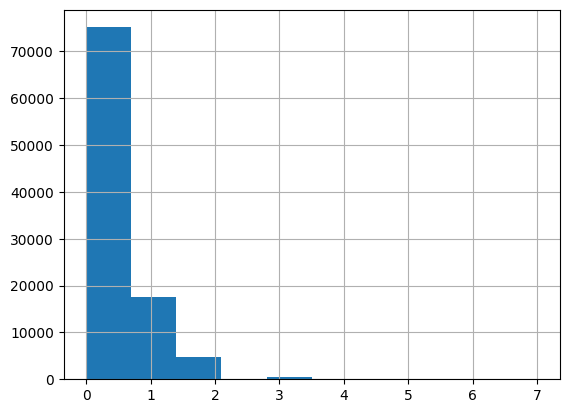

In [44]:
aux["embarazos"].hist()

In [42]:
aux["embarazos"].isna().mean()

0.0

In [46]:
aux["embarazos"]= aux["embarazos"].fillna(0)

C:\Users\blute\AppData\Local\Temp\ipykernel_12668\1175126266.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  aux["embarazos"]= aux["embarazos"].fillna(0)


In [47]:
aux.to_excel("ultimas.xlsx")

## Edad

In [75]:
df_edad = df[["edad"]]

In [80]:
df_edad

,edad
0,24
1,30
2,38
3,23
4,18
...,...
98014,21
98015,32
98016,29
98017,24


In [82]:
def intervalo(x):
    if(x<17):
        s= "<17"
    elif(x>=17 and x<25):
        s= "17-25"
    elif(x>=25 and x<30):
        s= "25-30"
    elif(x>=30 and x<35):
        s= "30-35"
    else:
        s= ">35"
    return s
    

In [84]:
df_edad = df_edad[["edad"]].applymap(lambda x: intervalo(x))

In [85]:
df_edad.value_counts()

edad 
17-25    44953
25-30    24972
30-35    14506
>35      10816
<17       2772
dtype: int64

In [88]:
df_edad.to_excel("categorias2.xlsx", index = False)